#### Dicionário de dados

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa 
* `gender`: gênero (masculino e feminino) 
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos 
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico 
* `MultipleLines`: assisnatura de mais de uma linha de telefone 
* `InternetService`: assinatura de um provedor internet 
* `OnlineSecurity`: assinatura adicional de segurança online 
* `OnlineBackup`: assinatura adicional de backup online 
* `DeviceProtection`: assinatura adicional de proteção no dispositivo 
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo 
* `StreamingMovies`: assinatura de streaming de filmes 
* `Contract`: tipo de contrato
* `PaperlessBilling`: se o cliente prefere receber online a fatura
* `PaymentMethod`: forma de pagamento
* `Charges.Monthly`: total de todos os serviços do cliente por mês
* `Charges.Total`: total gasto pelo cliente

<h3>Importação das bibliotecas</h3>

In [2]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Importação dos dados (Extract)</h3>

In [3]:
response = requests.get(
    url=r'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
)

dados_json = response.json()

In [4]:
json_original = pd.DataFrame(dados_json) # Conversão para dataframe

<h3>Normalização separada de cada coluna</h3>

In [5]:
customer = pd.json_normalize(
    json_original[
        'customer'
    ]
)

phone = pd.json_normalize(
    json_original[
        'phone'
    ]
)

internet = pd.json_normalize(
    json_original[
        'internet'
    ]
)

account = pd.json_normalize(
    json_original[
        'account'
    ]
)

<h3>Junção de todas as colunas</h3>

In [6]:
df_original = pd.concat([
    json_original[['customerID', 'Churn']],
    customer, phone, internet, account
], axis=1)

<h3>Análise exploratória (Transform)</h3>

In [9]:
df_original.dtypes # Obs: Charges.Total deveria ser float

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object

In [103]:
df_original['Charges.Total'] = df_original['Charges.Total'].map(lambda x: x.strip() if isinstance(x, str) else x)
df_original['Charges.Total'] = df_original['Charges.Total'].map(lambda x: np.nan if x == '' else x)

In [11]:
df_original['Charges.Total'] = df_original['Charges.Total'].astype(float)

In [12]:
df_original['Charges.Total'].dtype # Tipo correto agora

dtype('float64')

##### Variáveis de interesse

* `Churn`
* `gender`
* `SeniorCitizen`
* `Partner`
* `Dependents`
* `tenure`
* `PhoneService`
* `MultipleLines`
* `InternetService`
* `OnlineSecurity`
* `OnlineBackup`
* `DeviceProtection`
* `TechSupport`
* `StreamingTV`
* `StreamingMovies`
* `Contract`
* `PaperlessBilling`
* `PaymentMethod`
* `Charges.Monthly`

In [13]:
df_original.shape

(7267, 21)

In [14]:
df_original.head(2)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


In [15]:
df_original.tail(2)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.60


In [16]:
df_original.nunique()

customerID          7267
Churn                  3
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
Charges.Monthly     1585
Charges.Total       6530
dtype: int64

In [17]:
df_original['customerID'].duplicated().sum() # Nenhum cliente duplicado

np.int64(0)

In [18]:
df_original['customerID'].isnull().sum()

np.int64(0)

In [19]:
df_original['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [107]:
df_original[df_original['Churn'] == ''].shape

(224, 21)

In [21]:
# Verificando a porcentagem de 'Churn' nulos.

print(
    f'{round(df_original[df_original['Churn'] == ''].shape[0] / df_original.shape[0] * 100, 2)}%'
)

3.08%


In [118]:
df_final = df_original[df_original['Churn'] != '']
# df_final.nunique()

In [23]:
df_final = df_final.dropna(subset=['Charges.Total'])

In [24]:
# Criação da coluna 'Charges.Diary'

df_final['Charges.Diary'] = (df_final['Charges.Monthly'] / 30).round(2)

df_final['Charges.Diary'].dtype

dtype('float64')

In [25]:
# df_final.head()

<h3>Padronização do dataframe</h3>

In [26]:
df_padronizado = df_final.copy(deep=True)

In [27]:
cols = [
    'Churn',
    'gender',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod'
]

In [28]:
for col in cols:
    print(f'{col}: {df_padronizado[col].unique()}')

Churn: ['No' 'Yes']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [29]:
pd.set_option('future.no_silent_downcasting', True)

cols_binarias = [
    'Churn',
    'gender',
    'Partner',
    'Dependents',
    'PhoneService',
    'PaperlessBilling'
]

df_padronizado[cols_binarias] = df_padronizado[cols_binarias].replace(
    {
        'Yes': 1,
        'No': 0,
        'Female': 1,
        'Male': 0
    }
).astype(int)

In [30]:
cols_trinarias = [
    'MultipleLines',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

df_padronizado[cols_trinarias] = df_padronizado[cols_trinarias].replace(
    {
        'No phone service': 'No',
        'No internet service': 'No'
    }
)

df_padronizado[cols_trinarias] = df_padronizado[cols_trinarias].replace(
    {
        'Yes': 1,
        'No': 0
    }
)

In [31]:
# df_padronizado

In [32]:
df_padronizado['Contract'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [33]:
df_padronizado['PaymentMethod'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [34]:
one_hot_contract = pd.get_dummies(df_padronizado['Contract'], prefix='Contract_', dtype=int, drop_first=True)

In [35]:
one_hot_payment = pd.get_dummies(df_padronizado['PaymentMethod'], prefix='Payment_Method_', dtype=int, drop_first=True)

In [36]:
# one_hot_contract

In [37]:
# one_hot_contract

In [38]:
df_padronizado = pd.concat([df_padronizado.drop(columns=['Contract', 'PaymentMethod']), one_hot_contract, one_hot_payment], axis=1)

<h3>Análise descritiva (Load)</h3>

In [39]:
df_final.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Charges.Diary'],
      dtype='object')

In [40]:
def criar_tabela_relativa(df, colunas):
    tabela = df.groupby(
        by=colunas
    ).size().unstack()

    tabela_relativa = tabela.div(tabela.sum(axis=1), axis=0)
    
    return tabela_relativa

In [41]:
df_final.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Charges.Diary'],
      dtype='object')

In [58]:
colunas_categoricas = [
    'gender', 'SeniorCitizen', 'Partner',
    'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling',
    'PaymentMethod'
]

valores_traduzidos = {
    'Yes': 'Sim',
    'No': 'Não',
    'Male': 'Masculino',
    'Female': 'Feminino',
    'No internet service': 'Sem internet',
    'No phone service': 'Sem telefone',
    'Month-to-month': 'Mensal',
    'One year': 'Anual',
    'Two year': 'Bienal',
    'Bank transfer (automatic)': 'Transferência bancária',
    'Credit card (automatic)': 'Cartão de crédito',
    'Electronic check': 'Boleto eletrônico',
    'Mailed check': 'Cheque enviado',
    0: 'Não',
    1: 'Sim'
}

colunas_traduzidas = {
    'gender': 'Gênero',
    'SeniorCitizen': 'Idoso',
    'Partner': 'Possui parceiro(a)',
    'Dependents': 'Possui dependentes',
    'PhoneService': 'Serviço telefônico',
    'MultipleLines': 'Múltiplas linhas',
    'InternetService': 'Serviço de internet',
    'OnlineSecurity': 'Segurança online',
    'OnlineBackup': 'Backup online',
    'DeviceProtection': 'Proteção de dispositivo',
    'TechSupport': 'Suporte técnico',
    'StreamingTV': 'Streaming TV',
    'StreamingMovies': 'Streaming de filmes',
    'Contract': 'Tipo de contrato',
    'PaperlessBilling': 'Fatura digital',
    'PaymentMethod': 'Forma de pagamento',
    'Churn': 'Cancelou'
}

df_traduzido = df_final.copy(deep=True)
df_traduzido = df_traduzido.replace(valores_traduzidos)
df_traduzido = df_traduzido.rename(columns=colunas_traduzidas)

colunas_categoricas_pt = [colunas_traduzidas[col] for col in colunas_categoricas]

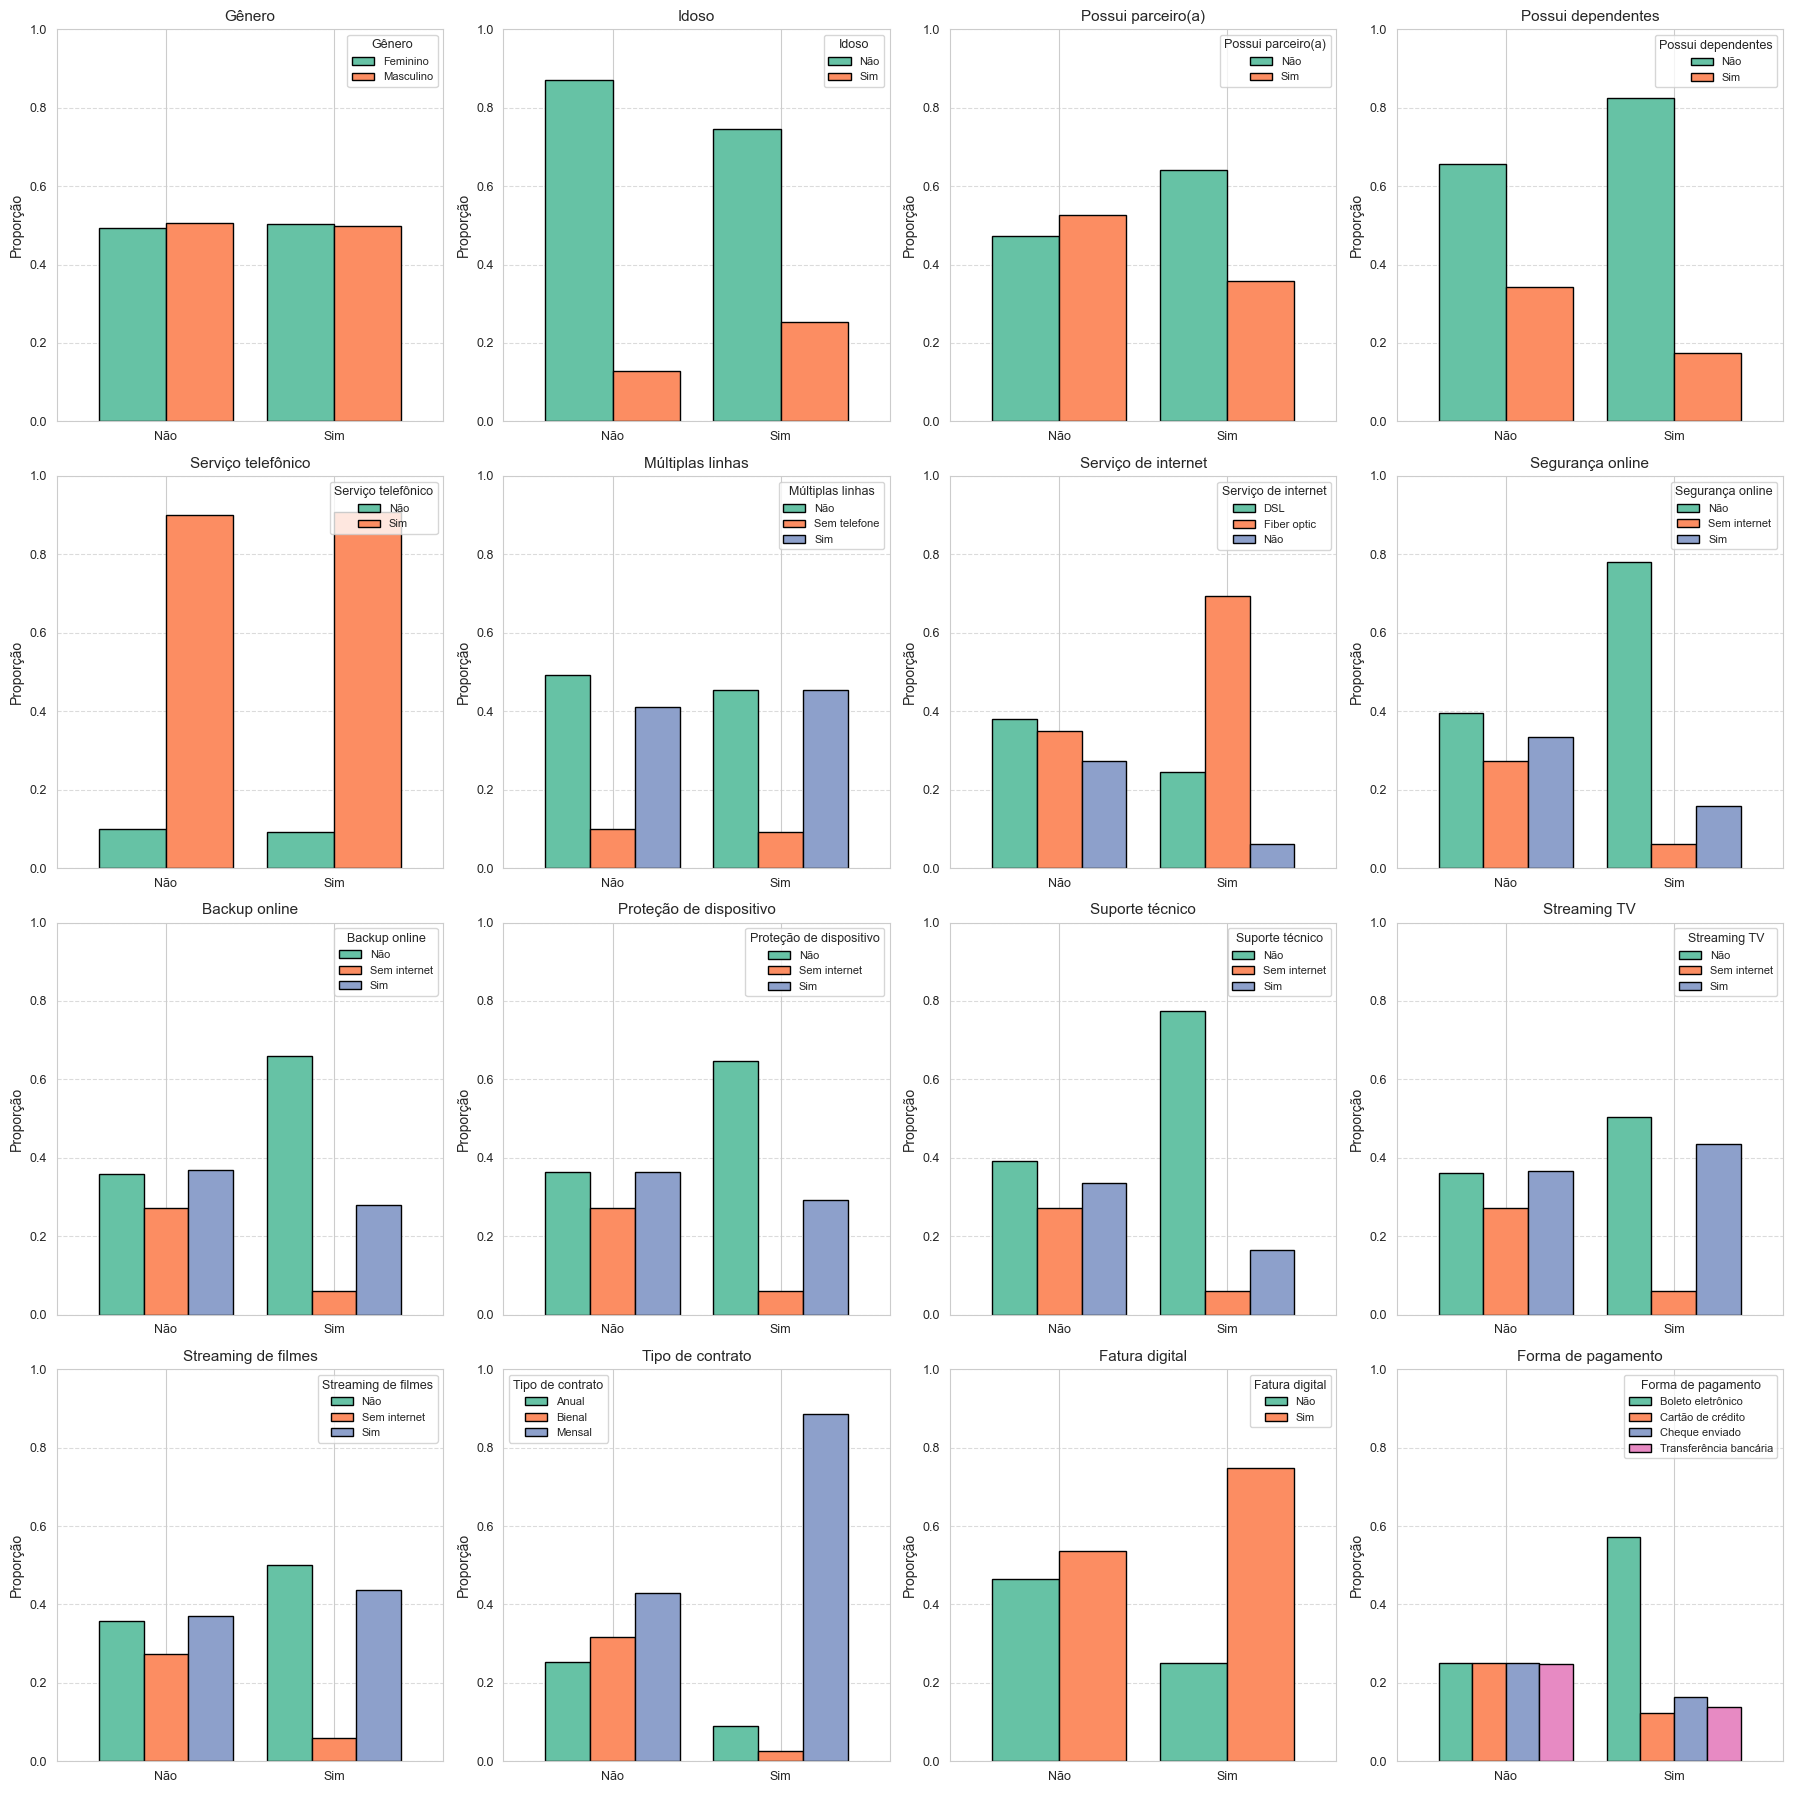

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams.update({
    'font.size': 9,
    'axes.titlesize': 11,
    'axes.labelsize': 10,
    'legend.fontsize': 8
})

fig, axs = plt.subplots(4, 4, figsize=(18, 18))

for i in range(4):
    for j in range(4):
        idx = i * 4 + j
        coluna_original = colunas_categoricas[idx]
        coluna_traduzida = colunas_traduzidas[coluna_original]

        tabela_atual = criar_tabela_relativa(df_traduzido, ['Cancelou', coluna_traduzida])
        
        tabela_atual.plot(
            kind='bar',
            ax=axs[i][j],
            color=sns.color_palette('Set2'),
            width=0.8,
            edgecolor='black'
        )

        axs[i][j].set_title(coluna_traduzida)
        axs[i][j].set_ylabel('Proporção')
        axs[i][j].set_xlabel('')
        axs[i][j].tick_params(axis='x', rotation=0)
        axs[i][j].grid(axis='y', linestyle='--', alpha=0.7)
        axs[i][j].legend(title=coluna_traduzida, loc='best')
        axs[i][j].set_ylim(0, 1)

plt.tight_layout()
plt.show()

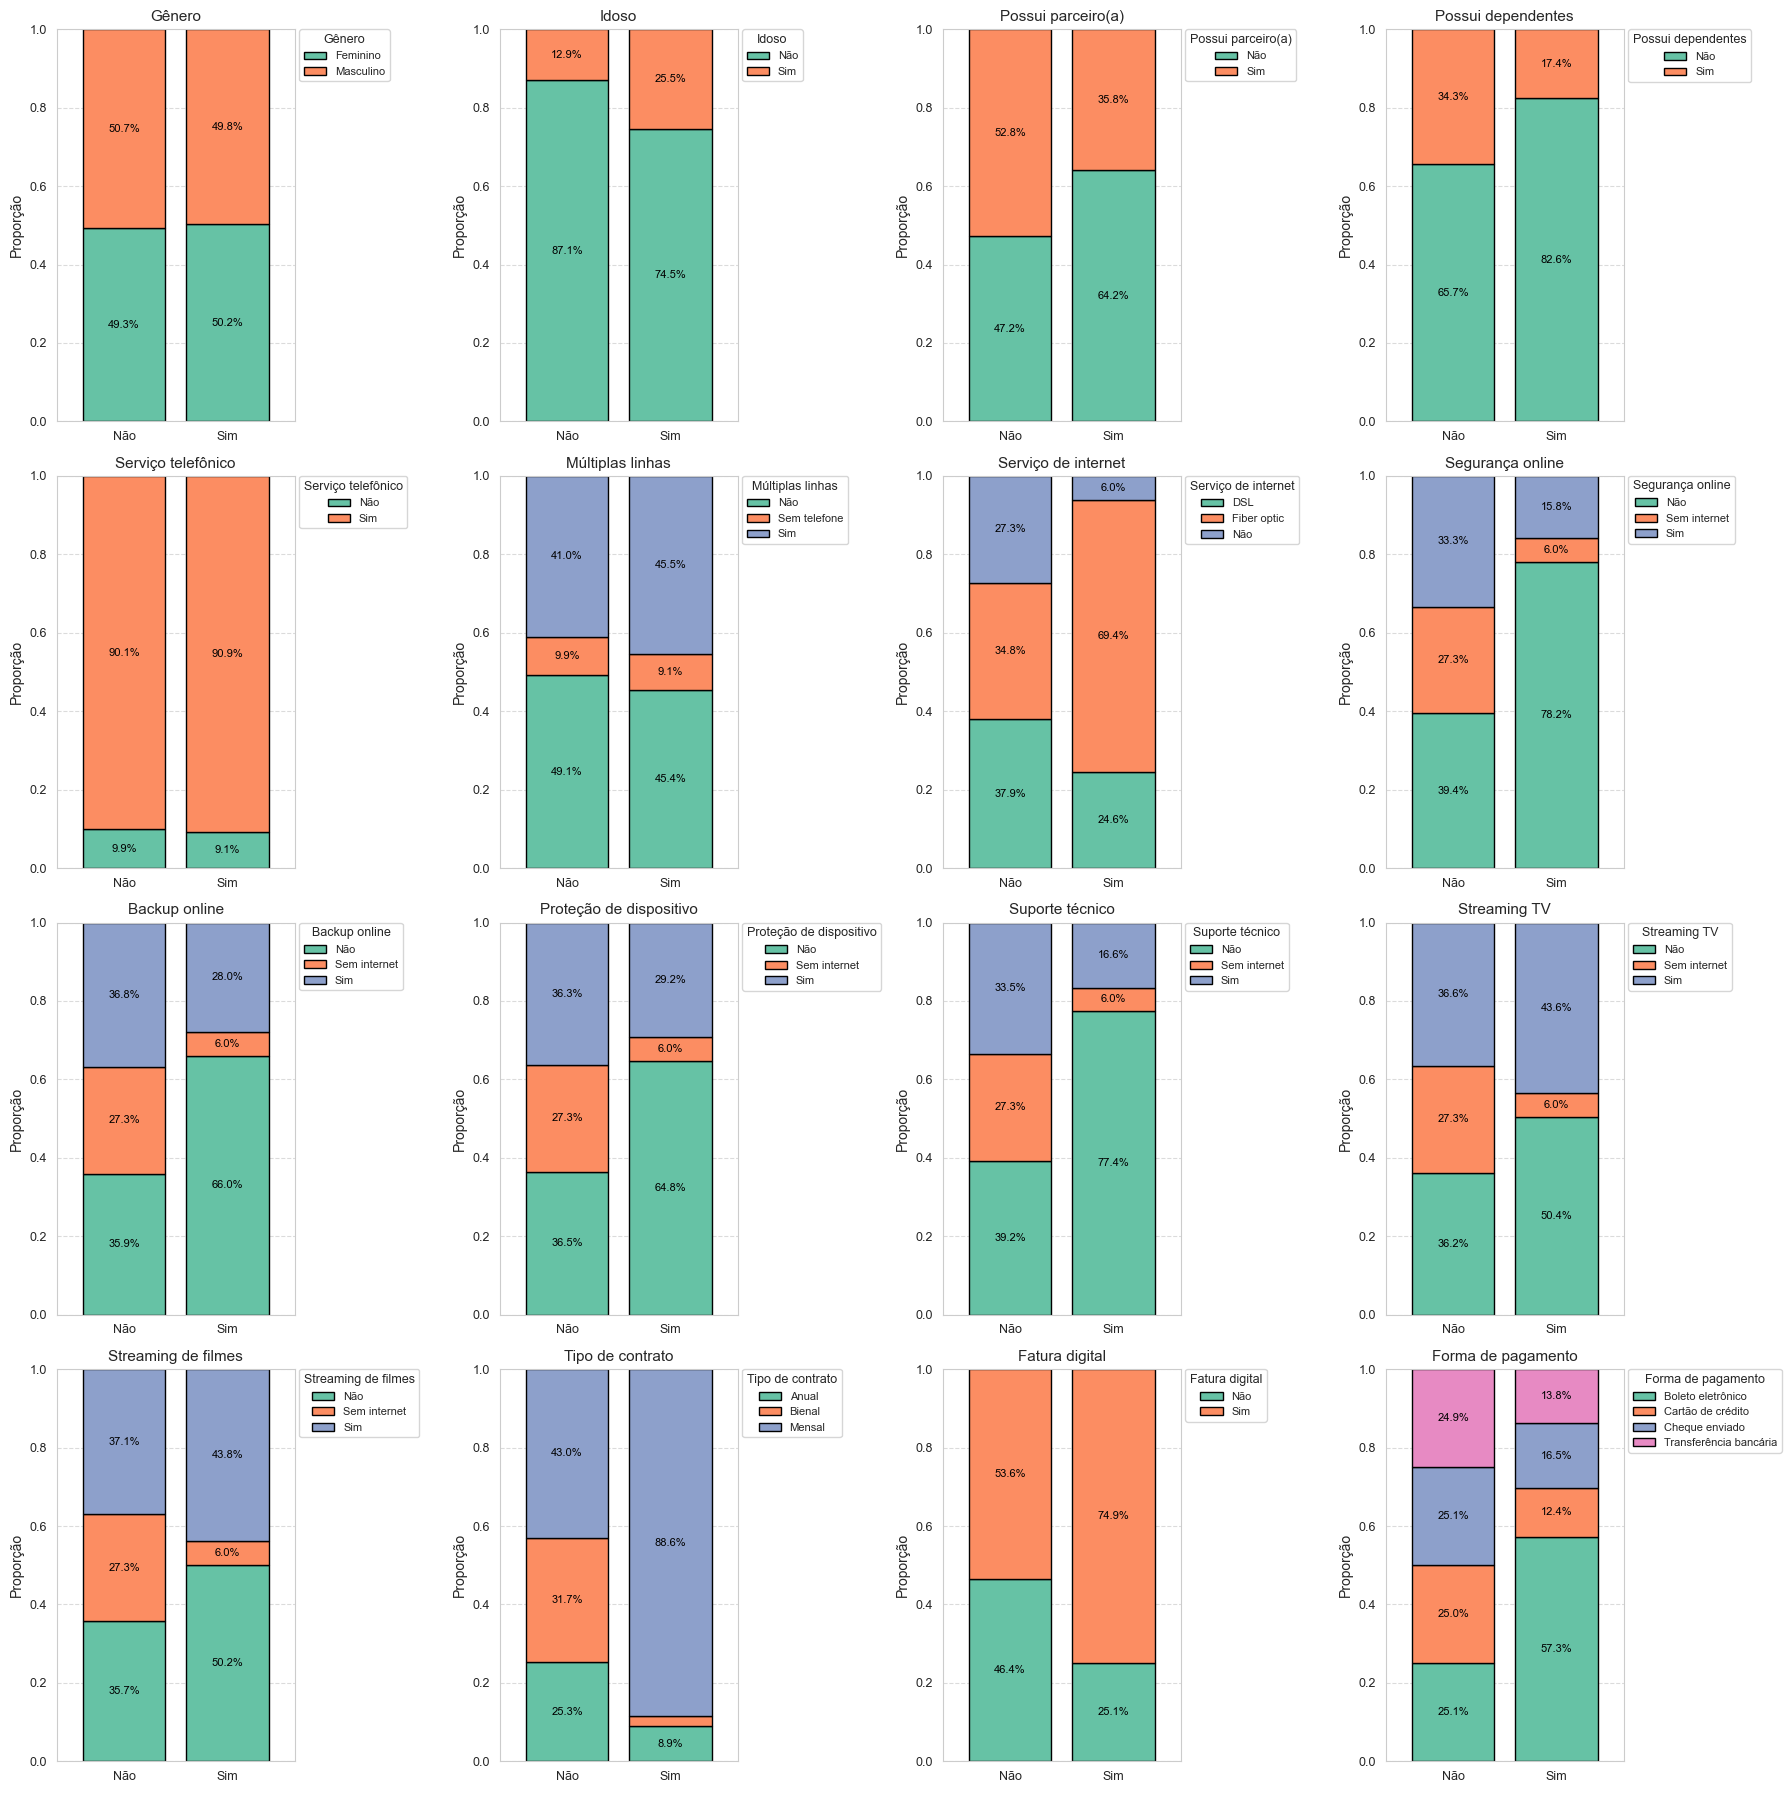

In [61]:
fig, axs = plt.subplots(4, 4, figsize=(18, 18))

for i in range(4):
    for j in range(4):
        idx = i * 4 + j
        coluna_original = colunas_categoricas[idx]
        coluna_traduzida = colunas_traduzidas[coluna_original]

        tabela_atual = criar_tabela_relativa(df_traduzido, ['Cancelou', coluna_traduzida])
        
        ax = axs[i][j]
        tabela_atual.plot(
            kind='bar',
            stacked=True,
            ax=ax,
            color=sns.color_palette('Set2'),
            width=0.8,
            edgecolor='black'
        )

        ax.set_title(coluna_traduzida)
        ax.set_ylabel('Proporção')
        ax.set_xlabel('')
        axs[i][j].tick_params(axis='x', rotation=0)
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.legend(
            title=coluna_traduzida,
            loc='upper left',
            bbox_to_anchor=(1.02, 1),
            borderaxespad=0
        )
        ax.set_ylim(0, 1)

        for bar_group in ax.containers:
            for bar in bar_group:
                altura = bar.get_height()
                if altura > (3 / 100):
                    ax.text(
                        bar.get_x() + bar.get_width() / 2,
                        bar.get_y() + altura / 2,
                        f'{altura * 100:.1f}%',
                        ha='center',
                        va='center',
                        fontsize=8,
                        color='black'
                    )

plt.tight_layout()
plt.show()

In [66]:
df_final.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Charges.Diary'],
      dtype='object')

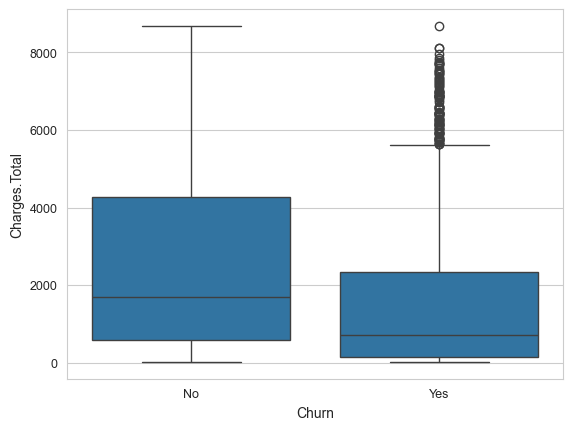

In [68]:
sns.boxplot(
    data=df_final,
    x='Churn',
    y='Charges.Total'
)

plt.show()

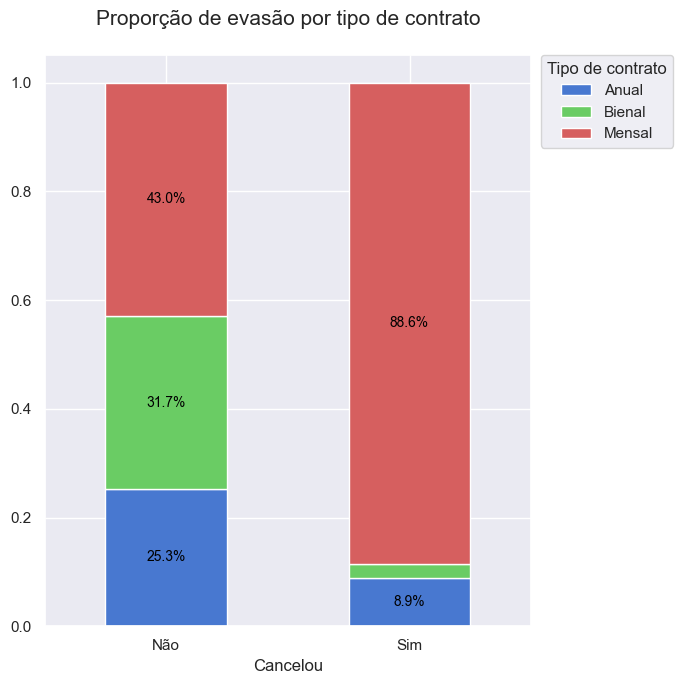

In [101]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)

sns.set_theme('notebook')

coluna_traduzida = colunas_traduzidas['Contract']

tabela_contrato = criar_tabela_relativa(df_traduzido, ['Cancelou', coluna_traduzida])

tabela_contrato.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=sns.color_palette('muted6'),
    edgecolor='white'
)

ax.set_title('Proporção de evasão por tipo de contrato\n',
             fontsize=15)
ax.legend(
    title=coluna_traduzida,
    loc='upper left',
    bbox_to_anchor=(1.02, 1),
    borderaxespad=0
)
ax.tick_params(axis='x', rotation=0)

for bar_group in ax.containers:
    for bar in bar_group:
        altura = bar.get_height()
        if altura > (3 / 100):
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + altura / 2,
                f'{altura * 100:.1f}%',
                ha='center',
                va='center',
                fontsize=10,
                color='black'
            )

plt.tight_layout()
plt.show()

<!DOCTYPE html>
<html lang="pt-BR">
<head>
  <meta charset="UTF-8">
  <title>Relatório de Análise de Evasão de Clientes</title>
  <style>
    body { font-family: Arial, sans-serif; line-height: 1.6; margin: 30px; background-color: #f9f9f9; color: #333; }
    h1, h2, h3 { color: #0a3d62; }
    p { margin-bottom: 10px; }
    ul { margin-bottom: 20px; }
  </style>
</head>
<body>

  <h1>Análise de Evasão de Clientes (Churn)</h1>

  <h2>1. Objetivo</h2>
  <p>Identificar padrões associados à evasão de clientes na base da empresa TelecomX, com foco em variáveis contratuais, demográficas e de serviços contratados.</p>

  <h2>2. Dicionário de Dados</h2>
  <ul>
    <li><strong>customerID:</strong> Identificação única do cliente</li>
    <li><strong>Churn:</strong> Se o cliente cancelou (Yes) ou não (No)</li>
    <li><strong>gender:</strong> Gênero do cliente</li>
    <li><strong>SeniorCitizen:</strong> Se o cliente é idoso (>= 65 anos)</li>
    <li><strong>Partner / Dependents:</strong> Presença de parceiro(a) ou dependentes</li>
    <li><strong>tenure:</strong> Tempo de contrato (em meses)</li>
    <li><strong>PhoneService, InternetService:</strong> Serviços contratados</li>
    <li><strong>OnlineSecurity, TechSupport, etc.:</strong> Serviços adicionais</li>
    <li><strong>Contract:</strong> Tipo de contrato (Mensal, Anual, Bienal)</li>
    <li><strong>PaymentMethod:</strong> Método de pagamento</li>
    <li><strong>Charges.Monthly / Charges.Total:</strong> Valores mensais e totais</li>
  </ul>

  <h2>3. Pré-processamento</h2>
  <ul>
    <li>Foram normalizadas estruturas aninhadas do JSON.</li>
    <li>Valores ausentes em <strong>Charges.Total</strong> foram convertidos para <em>NaN</em> e removidos.</li>
    <li>Criação da variável <strong>Charges.Diary</strong>, como uma estimativa diária do custo do cliente.</li>
  </ul>

  <h2>4. Padronização</h2>
  <ul>
    <li>Variáveis binárias como <strong>gender</strong>, <strong>Churn</strong>, <strong>Partner</strong> etc., foram convertidas para 0 e 1.</li>
    <li>Variáveis com 3 categorias, como <strong>MultipleLines</strong> ou <strong>StreamingTV</strong>, foram transformadas em binárias eliminando valores como “No internet service”.</li>
    <li>As variáveis <strong>Contract</strong> e <strong>PaymentMethod</strong> foram convertidas para dummies (one-hot encoding).</li>
  </ul>

  <h2>5. Análise Descritiva</h2>
  <h3>5.1 Variáveis com maior relação com churn</h3>
  <ul>
    <li><strong>Tipo de contrato:</strong> Clientes com contrato mensal apresentaram maior proporção de cancelamento.</li>
    <li><strong>Fatura digital:</strong> A opção por fatura digital esteve associada a maior churn.</li>
    <li><strong>Serviços adicionais:</strong> Clientes sem segurança online, suporte técnico ou backup tendem a cancelar mais.</li>
    <li><strong>Forma de pagamento:</strong> Boleto eletrônico está fortemente ligado ao churn, enquanto cartão de crédito ou transferência bancária apresentam churn menor.</li>
  </ul>

  <h3>5.2 Análise numérica</h3>
  <ul>
    <li><strong>Charges.Total:</strong> Clientes que cancelaram têm um gasto total médio inferior ao dos que permaneceram.</li>
    <li><strong>Charges.Diary:</strong> Clientes com valor diário mais baixo tendem a cancelar mais.</li>
  </ul>

  <h2>6. Conclusão</h2>
  <p>O perfil de cliente mais propenso a cancelar:</p>
  <ul>
    <li>Contrato mensal</li>
    <li>Pagamento por boleto eletrônico</li>
    <li>Sem serviços adicionais como segurança ou suporte</li>
    <li>Menor valor total gasto</li>
  </ul>
  <p>Esse conhecimento pode orientar estratégias de retenção focadas em:</p>
  <ul>
    <li>Incentivar migração para contratos anuais ou bienais</li>
    <li>Oferecer bônus por uso de cartão ou débito automático</li>
    <li>Melhorar a comunicação sobre os benefícios dos serviços adicionais</li>
  </ul>

</body>
</html>